# 6.6 Sourcing and Analyzing Time series Data

## 1. Importing Data and libraries 
## 2. Subsetting, wrangling, and cleaning time series data.
## 3. Time series analysis: decompostion
## 4. Testing for stationary
## 5. Stationarizing

# 1. Importing librarires and Data

In [1]:
#Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')



In [2]:
path =r'/Users/jazmingutierrez/Sept2024LifeExpectancy'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_clean.csv'), index_col = False)

In [4]:
df.head()

,Unnamed: 0,Country Name,Country Code,Region,Income Group,Year,Life Expectancy,Prevalence of Undernourishment,CO2,Health Expenditure,Education Expenditure,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable,Disease Type
0,0,Afghanistan,AFG,South Asia,Low income,2001,56.3080,47.8,730.0,9.861581,3.373310,10.809000,49.154430,2179727.10,9689193.70,5795426.38,Communicable
1,1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.0590,67.5,15960.0,4.483516,2.920000,4.004000,49.154430,1392080.71,11190210.53,2663516.34,Communicable
2,2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.2880,4.9,3230.0,7.139524,3.458700,18.575001,40.520895,117081.67,140894.78,532324.75,NonCommunicable
3,3,Andorra,AND,Europe & Central Asia,High income,2001,72.1685,6.2,520.0,5.865939,2.981845,5.920000,21.788660,1697.99,695.56,13636.64,NonCommunicable
4,4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.5440,2.8,97200.0,2.484370,3.867370,2.493000,82.723628,144678.14,65271.91,481740.70,NonCommunicable


## 2. Subsetting Data 

Subset of year and life expectancy for an individual country United states was choosen to closely analyze how life expectancy changes over the years. 

In [5]:
# Filter rows where the Country is "united States"
us_data= df[df['Country Name'] == 'United States']

In [6]:
# Select only 'Year' and ' Life Expectancy' coulmns
us_subset = us_data[['Year', 'Life Expectancy']]

In [7]:
# Display subset 
us_subset.head()

,Year,Life Expectancy
166,2001,76.836585
340,2002,76.936585
514,2003,77.036585
688,2004,77.487805
862,2005,77.487805


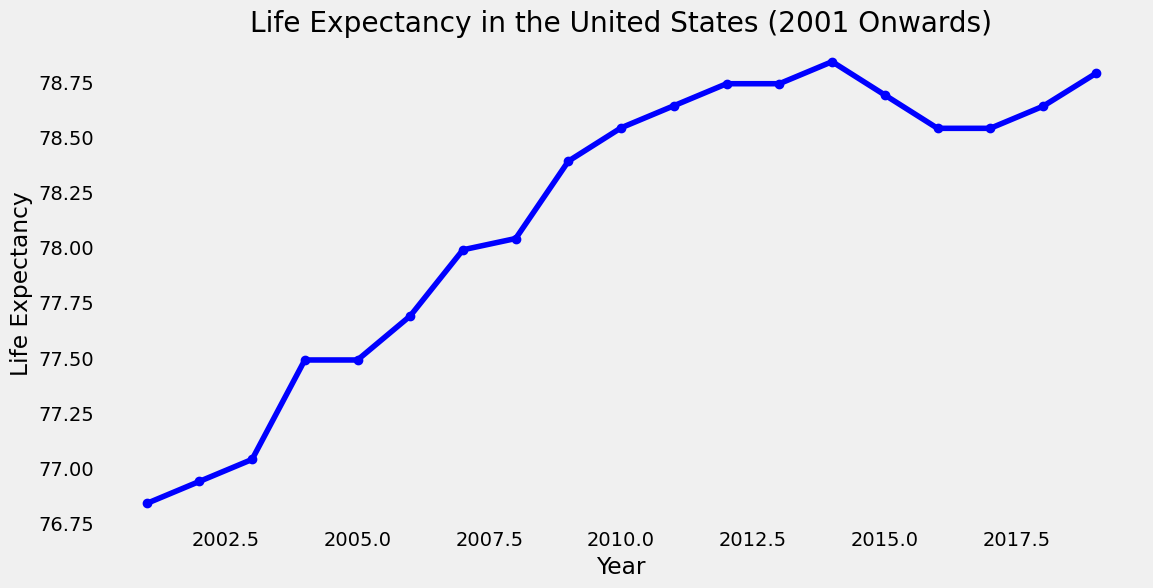

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(us_subset['Year'], us_subset['Life Expectancy'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy in the United States (2001 Onwards)')
plt.grid()
plt.show()

In [9]:
# Ensure the 'Year' column is set as the index for time series analysis
us_subset.set_index('Year', inplace=True)

## 3. Decomposition

In [10]:
# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(us_subset['Life Expectancy'], model='additive', period=1)

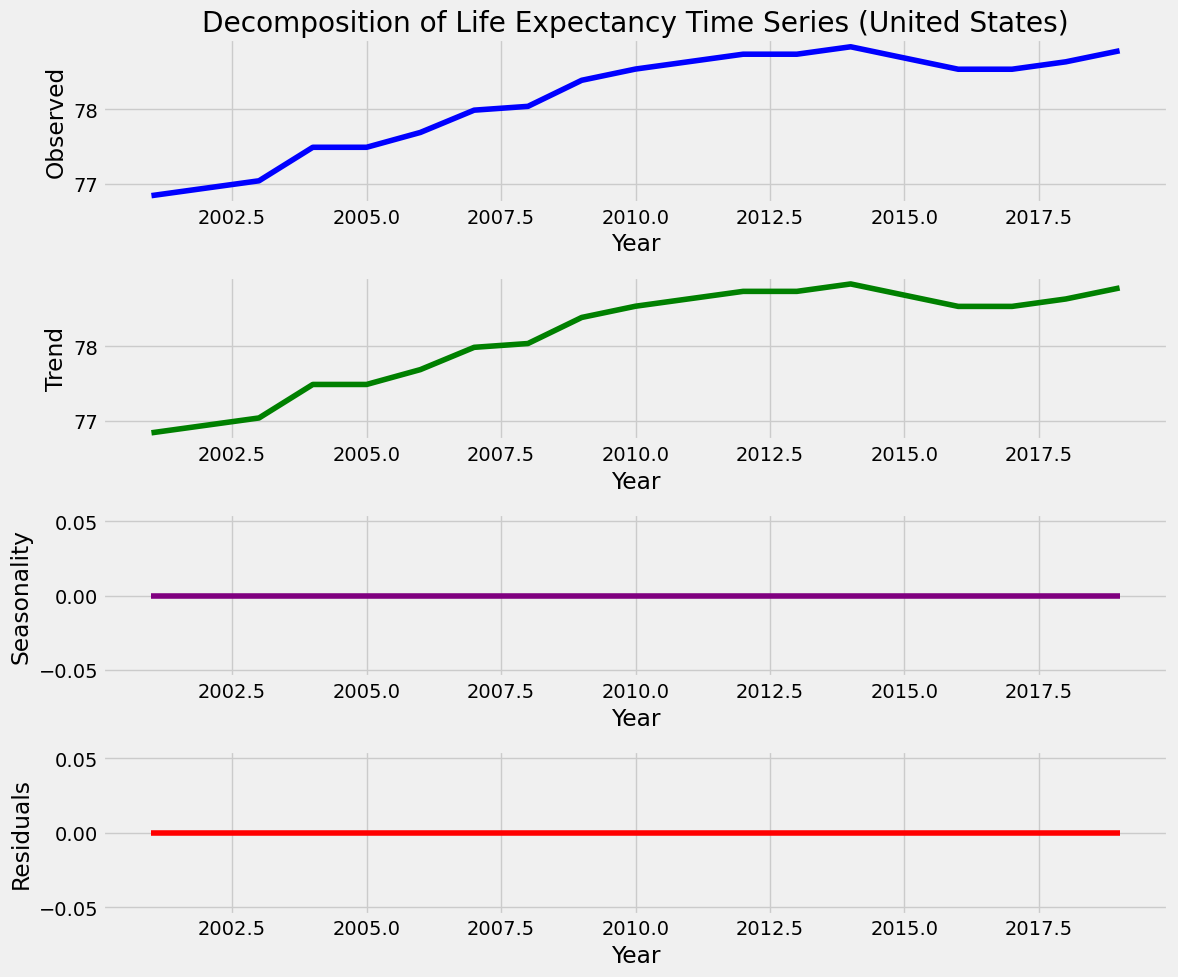

In [11]:
# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
decomposition.observed.plot(ax=ax1, legend=False, color='b')
ax1.set_ylabel('Observed')
ax1.set_title('Decomposition of Life Expectancy Time Series (United States)')

decomposition.trend.plot(ax=ax2, legend=False, color='g')
ax2.set_ylabel('Trend')

decomposition.seasonal.plot(ax=ax3, legend=False, color='purple')
ax3.set_ylabel('Seasonality')

decomposition.resid.plot(ax=ax4, legend=False, color='r')
ax4.set_ylabel('Residuals')

plt.tight_layout()
plt.show()

## 4. Testing for Stationary

In [12]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    """
    Perform the Augmented Dickey-Fuller test and print results.
    """
    print('Dickey-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag='AIC')  # Perform the ADF test
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result[f'Critical Value ({key})'] = value
    print(result)


In [13]:
# Assuming the cleaned subset of U.S. data is already available
us_life_expectancy = us_subset['Life Expectancy']  # Extract the column


In [14]:
# Perform the test on the extracted series
dickey_fuller(us_life_expectancy)


Dickey-Fuller Stationarity Test:
Test Statistic                 -1.221416
p-value                         0.664316
Number of Lags Used             6.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


The test statistic is greater than all critical values then we can't reject the null hypothesis. and the p-value is higher then 0.05 indicating the time series is non-stationary.

## 5. Stationarizing

In [15]:
# Apply first-order differencing to the U.S. life expectancy series
us_first_diff = us_life_expectancy.diff().dropna()  # Drop NaN created by differencing

# Display the first few rows of the differenced series
print(us_first_diff.head())


Year
2002    0.10000
2003    0.10000
2004    0.45122
2005    0.00000
2006    0.20000
Name: Life Expectancy, dtype: float64


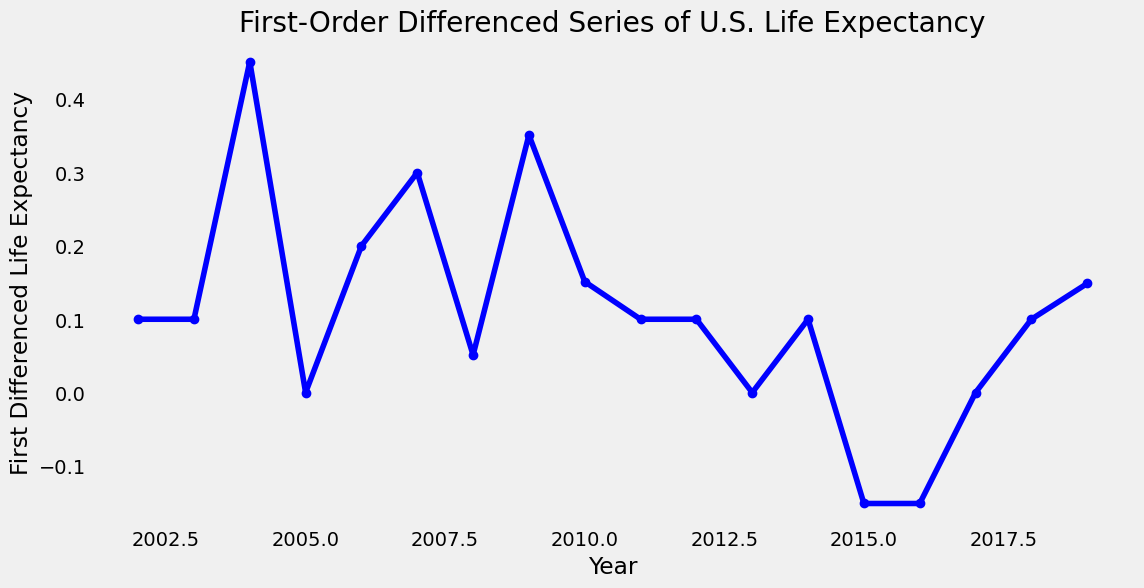

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(us_first_diff, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('First Differenced Life Expectancy')
plt.title('First-Order Differenced Series of U.S. Life Expectancy')
plt.grid()
plt.show()


In [17]:
# Perform the Dickey-Fuller test on the first-order differenced series
dickey_fuller(us_first_diff)


Dickey-Fuller Stationarity Test:
Test Statistic                 -2.654963
p-value                         0.082161
Number of Lags Used             7.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


The p-vlaue is below 0.05 the differenced series is stationary and significant. The test statistic is lower than the crtical values therefore  we reject the null hypothesis. 

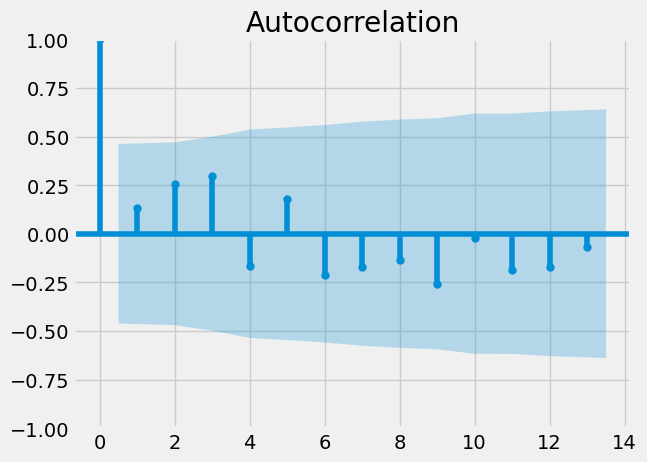

In [18]:
 #Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(us_first_diff)
plt.show()